In [1]:
!pip install numpy pandas opencv-python

In [2]:
!tar zxvf /content/pca_data1.tar.gz

data/pca_data1/
data/pca_data1/train/
data/pca_data1/train/Ariel_Sharon/
data/pca_data1/train/Ariel_Sharon/00026.png
data/pca_data1/train/Ariel_Sharon/00033.png
data/pca_data1/train/Ariel_Sharon/00041.png
data/pca_data1/train/Ariel_Sharon/00055.png
data/pca_data1/train/Ariel_Sharon/00064.png
data/pca_data1/train/Ariel_Sharon/00067.png
data/pca_data1/train/Ariel_Sharon/00083.png
data/pca_data1/train/Ariel_Sharon/00099.png
data/pca_data1/train/Ariel_Sharon/00132.png
data/pca_data1/train/Ariel_Sharon/00156.png
data/pca_data1/train/Ariel_Sharon/00176.png
data/pca_data1/train/Ariel_Sharon/00189.png
data/pca_data1/train/Ariel_Sharon/00190.png
data/pca_data1/train/Ariel_Sharon/00195.png
data/pca_data1/train/Ariel_Sharon/00214.png
data/pca_data1/train/Ariel_Sharon/00220.png
data/pca_data1/train/Ariel_Sharon/00260.png
data/pca_data1/train/Ariel_Sharon/00261.png
data/pca_data1/train/Ariel_Sharon/00263.png
data/pca_data1/train/Ariel_Sharon/00273.png
data/pca_data1/train/Ariel_Sharon/00285.png
dat

In [3]:
import os
from os.path import join
from glob import glob
import pandas as pd
import numpy as np
import cv2
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from tqdm.notebook import tqdm

def show(img_bgr):
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()

# 특징 추출
PCA

In [4]:
def load_images(path):
  list_human = sorted(glob(join(path, '*')))

  list_jpg = sorted(glob(join(path, '*/*.png')))

  # 전체 얼굴 이미지 로딩하기
  list_img = []
  for jpg_path in tqdm(list_jpg):
      list_img.append(cv2.imread(jpg_path, 1))
  np_imgs = np.array(list_img)
  # print(np_imgs.shape)

  return list_human, list_jpg, list_img

In [5]:
train_dir = '/content/data/pca_data1/train'
list_human, list_jpg, list_img = load_images(train_dir)
print(list_human[:3])
np_imgs = np.array(list_img)
print(np_imgs.shape)

  0%|          | 0/966 [00:00<?, ?it/s]

['/content/data/pca_data1/train/Ariel_Sharon', '/content/data/pca_data1/train/Colin_Powell', '/content/data/pca_data1/train/Donald_Rumsfeld']
(966, 50, 37, 3)


In [6]:
test_dir = '/content/data/pca_data1/test'

list_human_test, list_jpg_test, test_list_img = load_images(test_dir)

  0%|          | 0/322 [00:00<?, ?it/s]

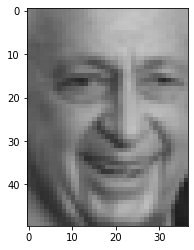

In [19]:
show(list_img[0])

In [7]:
#2차원 이미지 1차원으로
def make_arr(list_img):
  h, w, c = list_img[0].shape
  arr = np.zeros([len(list_img), h*w])
  for i in range(len(list_img)):
    img_gray = cv2.cvtColor(list_img[i], cv2.COLOR_BGR2GRAY)
    arr[i,:] = np.reshape(np.asarray(img_gray),[1,h*w])

  return arr

In [8]:
X_train = make_arr(list_img)
X_test = make_arr(test_list_img)

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))
print("X_train_pca.shape: {}".format(X_test_pca.shape))

X_train_pca.shape: (966, 128)
X_train_pca.shape: (322, 128)


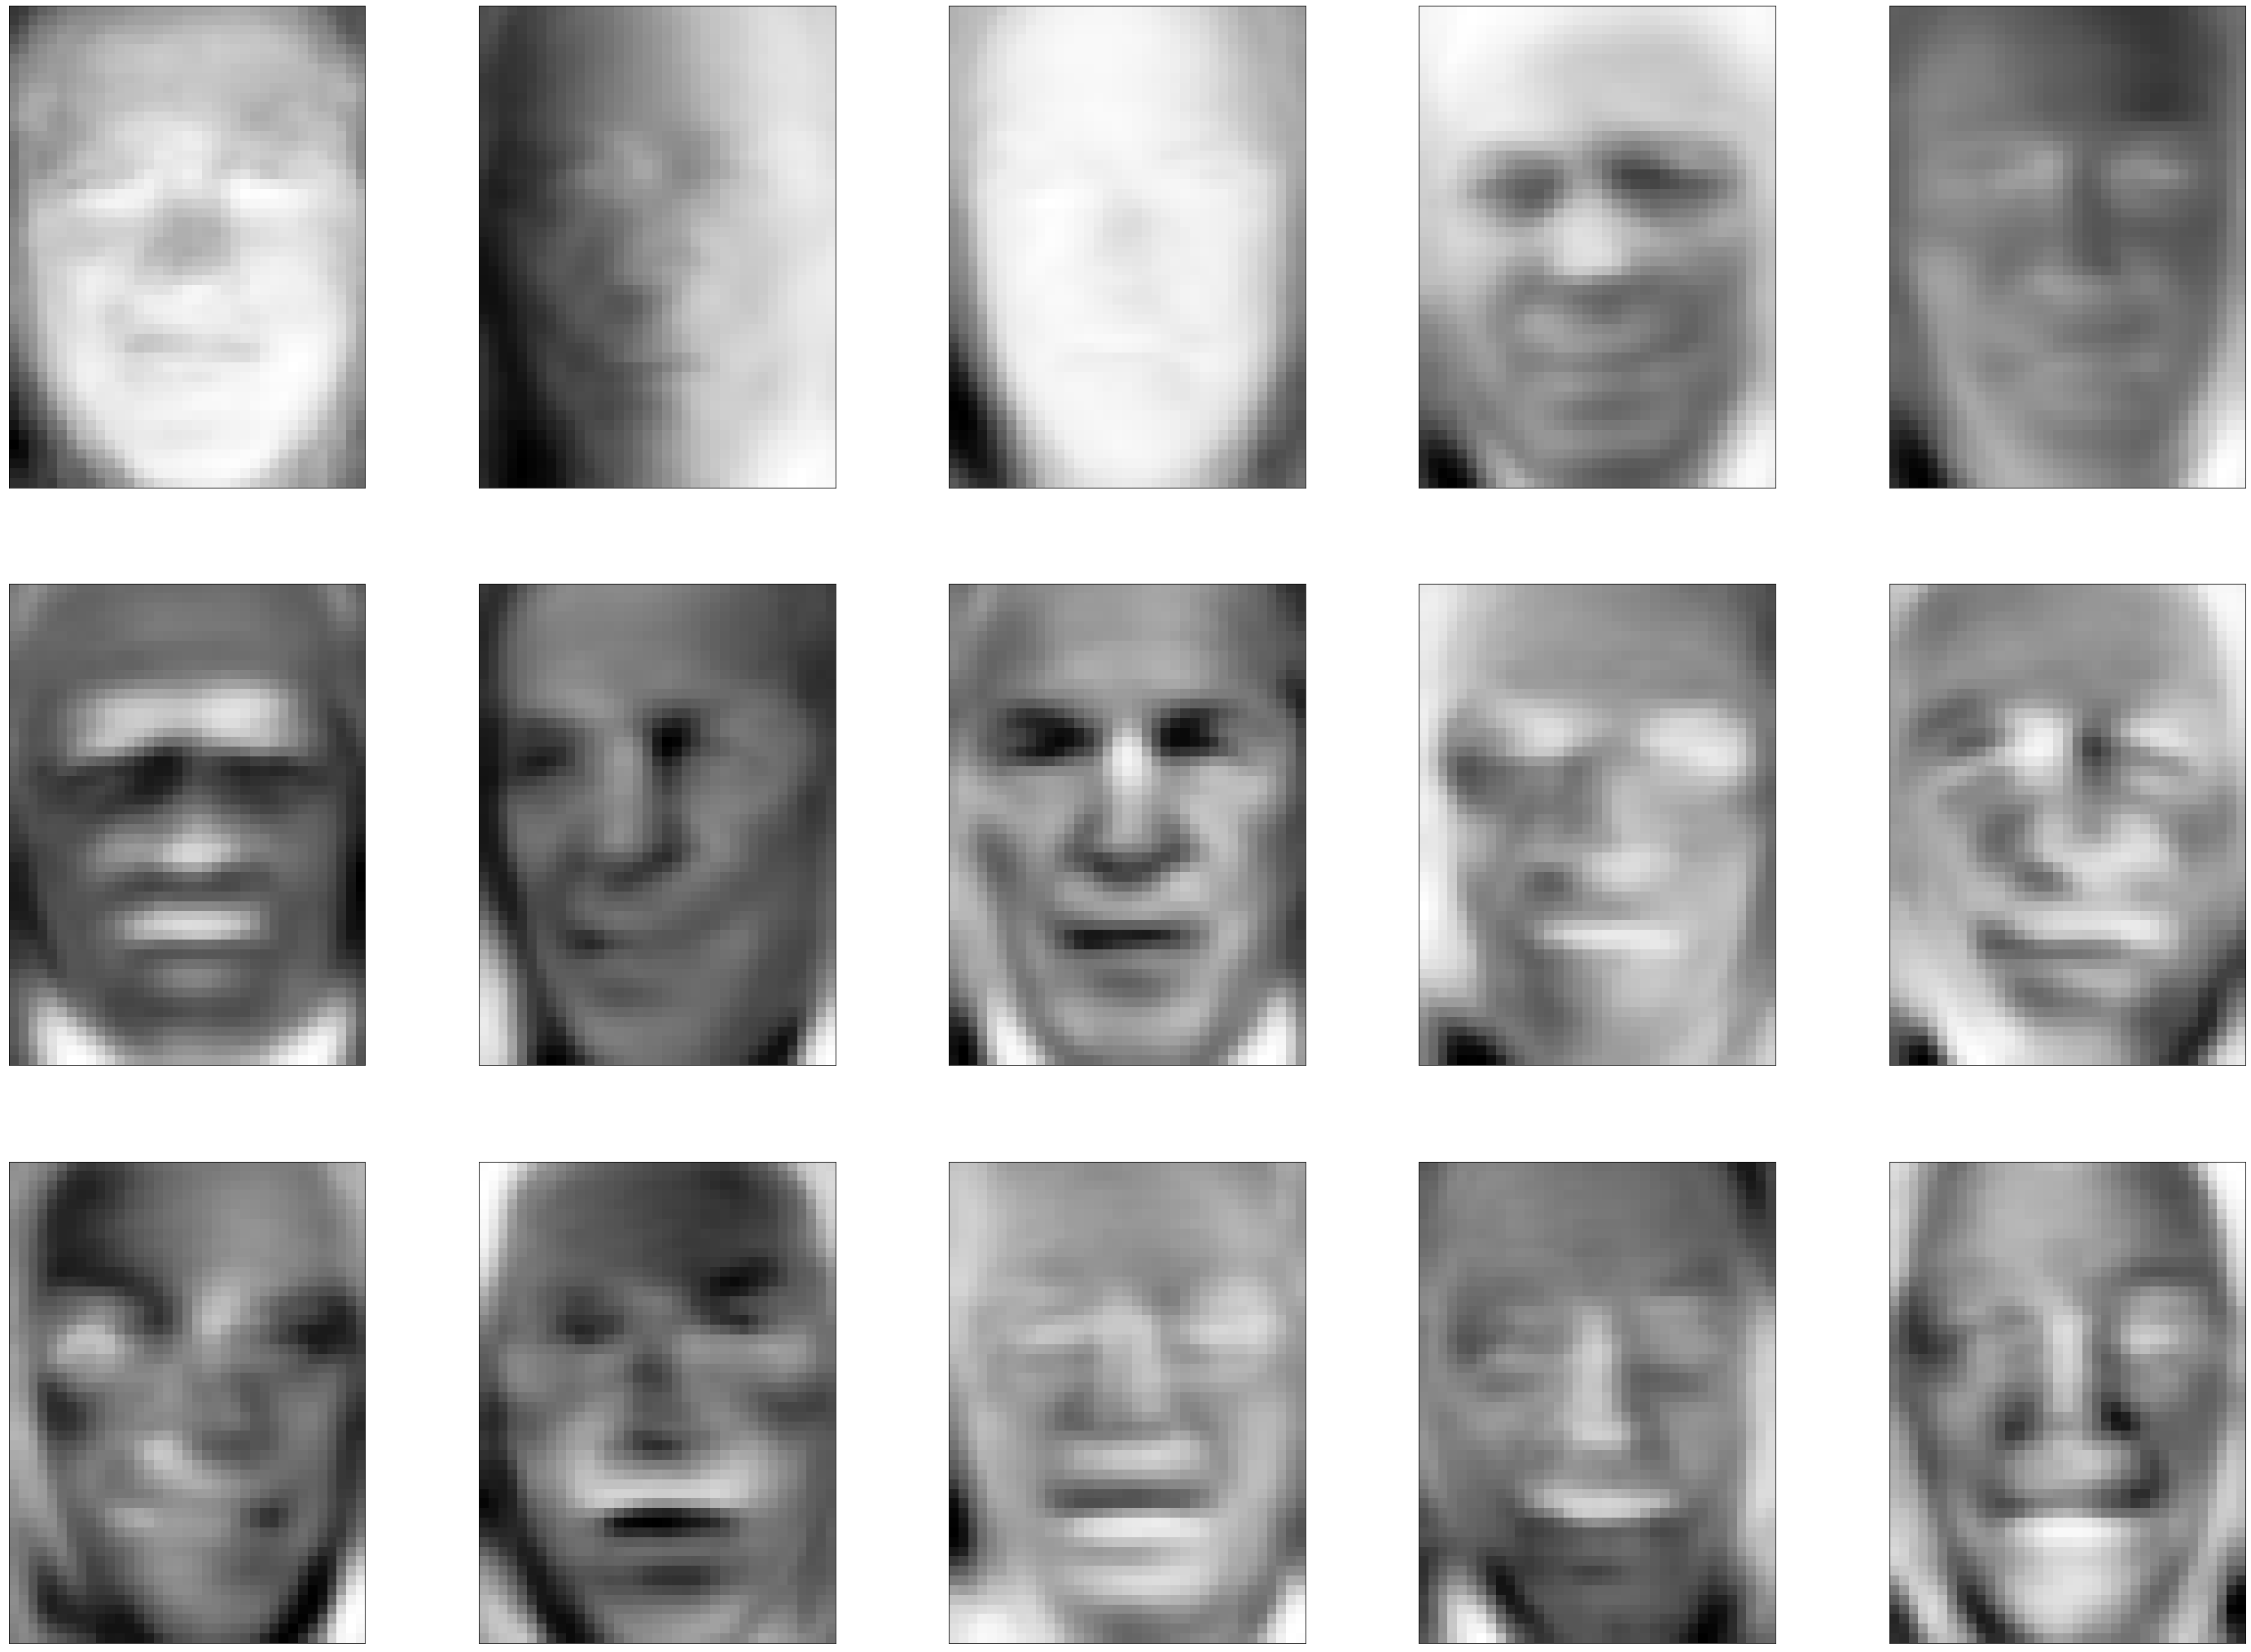

In [10]:
fig, axes = plt.subplots(3,5, figsize=(50,37), subplot_kw={'xticks': (), 'yticks': ()})
image_shape = cv2.cvtColor(list_img[0], cv2.COLOR_BGR2GRAY).shape
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='Greys')

# Matching

In [40]:
def get_features(list_jpg, list_feature):
  list_result = []
  for i in range(len(list_jpg)):
    list_result.append([list_jpg[i], list_feature[i]])
  
  return list_result

In [41]:
list_train_features = get_features(list_jpg, X_train_pca)
list_test_features = get_features(list_jpg_test, X_test_pca)

In [42]:
def match_face2(feat_query, feat_train):
  np_dist_user_db = np.linalg.norm(feat_query - feat_train, axis=1)
  return list_jpg[np_dist_user_db.argmin()], np_dist_user_db.min()

In [43]:
# %%time
def get_pred_matching(query_feat, db_feats, thresh=3):
  len_query_feat = len(query_feat[1])
  best_matched = match_face2(query_feat[1], db_feats)

  list_matched = []
  if best_matched[1] > thresh:
    list_matched = best_matched
  
  return list_matched

list_out = get_pred_matching(list_test_features[0], X_train_pca)
print(list_out)

('/content/data/pca_data1/train/Ariel_Sharon/00413.png', 12.555704378511006)


In [45]:
list_pred = []
for feat in tqdm(list_test_features):
  basename = os.path.basename(feat[0])
  pred_feat = get_pred_matching(feat, X_train_pca, 5)
  pred_name = pred_feat[0].split('/')[5] if len(pred_feat) > 0 else '-1'
  list_pred.append([feat[0], pred_name])

  0%|          | 0/322 [00:00<?, ?it/s]

In [46]:
list_pred[:30]

[['/content/data/pca_data1/test/Ariel_Sharon/00024.png', 'Ariel_Sharon'],
 ['/content/data/pca_data1/test/Ariel_Sharon/00052.png', 'Ariel_Sharon'],
 ['/content/data/pca_data1/test/Ariel_Sharon/00081.png', 'Hugo_Chavez'],
 ['/content/data/pca_data1/test/Ariel_Sharon/00123.png', 'Ariel_Sharon'],
 ['/content/data/pca_data1/test/Ariel_Sharon/00157.png', 'George_W_Bush'],
 ['/content/data/pca_data1/test/Ariel_Sharon/00168.png', 'Donald_Rumsfeld'],
 ['/content/data/pca_data1/test/Ariel_Sharon/00209.png', 'Donald_Rumsfeld'],
 ['/content/data/pca_data1/test/Ariel_Sharon/00217.png', 'George_W_Bush'],
 ['/content/data/pca_data1/test/Ariel_Sharon/00218.png', 'Ariel_Sharon'],
 ['/content/data/pca_data1/test/Ariel_Sharon/00233.png', 'Ariel_Sharon'],
 ['/content/data/pca_data1/test/Ariel_Sharon/00245.png', 'George_W_Bush'],
 ['/content/data/pca_data1/test/Ariel_Sharon/00285.png', 'Tony_Blair'],
 ['/content/data/pca_data1/test/Ariel_Sharon/00295.png', 'George_W_Bush'],
 ['/content/data/pca_data1/test

In [36]:
def change_to_class(list_jpg):
  class_list = []
  for name in list_jpg:
    class_list.append(name.split('/')[5])
  
  return class_list

In [37]:
# 다른 매칭 알고리즘 (KneighborsClassifier 사용)
from sklearn.neighbors import KNeighborsClassifier

class_list = change_to_class(list_jpg)
test_class_list = change_to_class(list_jpg_test)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, class_list)
print("{:.2f}".format(knn.score(X_test_pca, test_class_list)))

0.70


# Metric 계산

In [12]:
def load_images2(path):
  list_human = sorted(glob(join(path, '*')))

  list_jpg = sorted(glob(join(path, '*.png')))

  # 전체 얼굴 이미지 로딩하기
  list_img = []
  for jpg_path in tqdm(list_jpg):
      list_img.append(cv2.imread(jpg_path, 1))
  np_imgs = np.array(list_img)

  return list_human, list_jpg, list_img

In [13]:
pred = '/content/data/pca_data1/train/George_W_Bush'

list_human_pred, list_jpg_pred, list_img_pred = load_images2(pred)

George_test = '/content/data/pca_data1/test/George_W_Bush'
list_george, list_jpg_george, list_img_george = load_images2(George_test)

  0%|          | 0/384 [00:00<?, ?it/s]

  0%|          | 0/146 [00:00<?, ?it/s]

In [23]:
from sklearn.decomposition import PCA

pred = make_arr(list_img_pred)
y_test = make_arr(list_img_george)

pca = PCA(n_components=128, whiten=True, random_state=0).fit(X_train)
pred_pca = pca.transform(pred)
y_test_pca = pca.transform(y_test)

print("pred_pca.shape: {}".format(pred_pca.shape))
print("y_test_pca.shape: {}".format(y_test_pca.shape))

pred_pca.shape: (384, 128)
y_test_pca.shape: (146, 128)


In [24]:
# list_train_features = get_features(list_jpg_pred, pred_pca)
list_george_feature = get_features(list_jpg_george, y_test_pca)

In [77]:
%%time
def match_face(feat_query, feat_train, match_points=30, flg_show=True, img_query=None, img_train=None):
  bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
  matches = bf.match(feat_query, feat_train)
  matches = sorted(matches, key=lambda x: x.distance)

  if flg_show:
    kp_q = [cv2.KeyPoint(f[1], f[0], 3) for f in feat_query]
    kp_t = [cv2.KeyPoint(f[1], f[0], 3) for f in feat_train]
    img_show = cv2.drawMatches(
        img_query, kp_q,
        img_train, kp_t,
        matches[:match_points], None, flags=2)
    plt.imshow(img_show)
    plt.show()
    
  sum_distance = sum([x.distance for x in matches])
  sum_distance_half = sum([x.distance for x in matches[:len(matches)//2]])

  return sum_distance, sum_distance_half, len(matches)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.15 µs


In [ ]:
# %%time
def get_pred_matching2(query_feat, db_feats, thresh=0.5):
  len_query_feat = len(query_feat[1])
  list_dist_w_query = []
  for fname, feat in db_feats:
    len_feat = len(feat)
    dist, dist_half, len_match = match_face(query_feat[1], feat)
    matched_ratio = 2 * len_match / (len_query_feat + len_feat)
    list_dist_w_query.append([fname, dist, len_match, len_query_feat, len_feat, matched_ratio])
  print(list_dist_w_query)

  # best_matched = min(list_dist_w_query, key=lambda x: x[1])
  best_matched = max(list_dist_w_query, key=lambda x: x[-1])

  list_matched = []
  if best_matched[1] > thresh:
    list_matched = best_matched
  
  return list_matched

list_out = get_pred_matching2(list_test_features[0], list_train_features)
print(list_out)

In [25]:
list_pred = []
for feat in tqdm(list_test_features):
  basename = os.path.basename(feat[0])
  pred_feat = get_pred_matching(feat, X_train_pca, 5)
  pred_name = pred_feat[0].split('/')[5] if len(pred_feat) > 0 else '-1'
  list_pred.append(['George_W_Bush', pred_name])

  0%|          | 0/146 [00:00<?, ?it/s]

In [26]:
list_pred[:30]

[['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', 'Donald_Rumsfeld'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', '-1'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', 'Hugo_Chavez'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_Bush', 'George_W_Bush'],
 ['George_W_

In [132]:
np_pred_true = np.array(list_pred)
np_pred = np_pred_true[:, 0]
np_true = np_pred_true[:, 1]

print((np_true == np_pred).sum())

128


In [133]:
conf_mat = confusion_matrix(np_true, np_pred)
conf_mat

array([[  0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   4,   0,   0],
       [  0,   0,   0,   7,   0,   0],
       [  0,   0,   0, 128,   0,   0],
       [  0,   0,   0,   1,   0,   0],
       [  0,   0,   0,   5,   0,   0]])

In [134]:
print(conf_mat.diagonal().sum())
print(conf_mat.diagonal().sum() / conf_mat.sum()) #정확도

128
0.8767123287671232


In [206]:
precision = sklearn.metrics.precision_score(np_true, np_pred, average='micro')
recall = sklearn.metrics.recall_score(np_true, np_pred, average='micro')

print(precision, recall)

0.8767123287671232 0.8767123287671232


In [136]:
tp_sum = conf_mat.diagonal().sum()
fp_sum = conf_mat.sum() - tp_sum
fn_sum = conf_mat.sum() - tp_sum
tn_sum = (len(conf_mat) - 2) * conf_mat.sum() * tp_sum

print(tp_sum, fp_sum, fn_sum, tn_sum)

128 18 18 74752


In [137]:
FAR = fp_sum / conf_mat.sum() #전체 시도 중 false positive의 합
print(FAR)

0.1232876712328767


In [138]:
FAR = fp_sum / (tn_sum + fp_sum)
FRR = fn_sum / (fn_sum + tp_sum)
print(FAR, FRR)

0.00024073826400962953 0.1232876712328767


# 본인 얼굴 사진을 이용한 인식

In [141]:
import dlib
# 얼굴 찾기
def find_face(img):
  detector_hog = dlib.get_frontal_face_detector() #detector 선언
  # img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  dlib_rects = detector_hog(img, 1)
  for dlib_rect in dlib_rects:
      l = dlib_rect.left()
      t = dlib_rect.top()
      r = dlib_rect.right()
      b = dlib_rect.bottom()

  return t, r, b, l

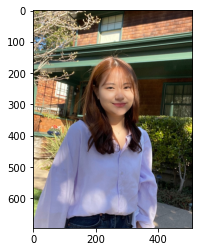

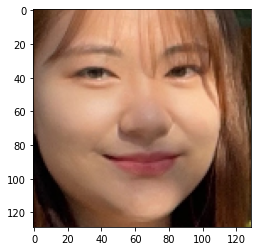

In [208]:
# my image
face_path = sorted(glob('./images/my_face_*.jpg'))
original_img_user = [cv2.resize(cv2.imread(p), None, fx=0.3, fy=0.3) for p in face_path]
list_img_user = []
for img in original_img_user:
  t, r, b, l = find_face(img)
  img = img[t:b, l:r]
  resized_img = cv2.resize(img, (37, 50))
  list_img_user.append(resized_img)

show(original_img_user[1])
show(list_img_user[1])

In [180]:
user = make_arr(list_img_user)

pca = PCA(n_components=128, whiten=True, random_state=0).fit(X_train)
user_pca = pca.transform(user)

print("user_pca.shape: {}".format(user_pca.shape))

user_pca.shape: (3, 128)


In [187]:
list_pred_user = []
list_user_features = get_features(face_path, user_pca)

for feat in tqdm(list_user_features):
  basename = os.path.basename(feat[0])
  pred_feat = get_pred_matching(feat, X_train_pca, 5)
  pred_name = pred_feat[0].split('/')[5] if len(pred_feat) > 0 else '-1'
  list_pred_user.append([basename, pred_name])

  0%|          | 0/3 [00:00<?, ?it/s]

In [188]:
list_pred_user

[['my_face_1.jpg', 'George_W_Bush'],
 ['my_face_2.jpg', 'Colin_Powell'],
 ['my_face_3.jpg', 'George_W_Bush']]

In [209]:
# 0번 이미지와 db 의 거리 계산
np_dist_user_db = np.linalg.norm(user_pca[0] - X_train_pca, axis=1)

# 0번 이미지와 user 이미지 전체의 거리 계산
np_dist_user_user = np.linalg.norm(user_pca[0] - user_pca, axis=1)

# db 1번 이미지와 전체 db의 거리 계산
np_dist_db_db = np.linalg.norm(X_train_pca[1] - X_train_pca, axis=1)

print(np_dist_user_db)
print(np_dist_user_user)
print(np_dist_db_db)

[19.94212494 24.00762005 18.92296907 17.66119417 20.91021801 23.7234775
 23.57974798 21.09701722 18.75457131 19.78414368 20.3449734  19.8304207
 19.10248788 19.47095766 18.73747143 19.47094754 18.91828336 20.46482769
 18.25107346 22.22993566 22.38807938 19.89831052 20.63879073 19.96552151
 21.23374715 19.1944238  24.34263537 19.32532906 20.14838391 20.04076538
 20.06589749 18.85384422 19.67401938 20.5326077  18.53405785 22.53519715
 18.83618123 19.27502507 20.1359364  19.98409831 20.1367969  22.48750317
 20.02883297 18.72688043 21.5912786  18.60809698 22.51114525 18.79811557
 19.74957672 20.66830913 18.48008006 19.94111318 20.76528988 18.53771288
 18.09390333 25.13961134 21.18799866 18.09139068 20.78629031 23.48879477
 19.22594508 23.71314867 21.82388194 17.47545266 17.97160421 19.13210199
 17.15030173 19.41407835 19.0053649  18.47176017 19.12143151 20.00414815
 19.15666052 18.58745349 20.09344331 22.33844185 20.38163869 18.20001605
 19.29294131 20.33933708 19.06320478 18.68233339 21.7

16.326017647241656


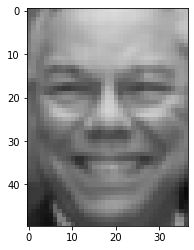

In [210]:
print(np_dist_user_db.min())
show(list_img[np_dist_user_db.argmin()])